# House Price Prediction
Given the Area income, House age, #rooms, #bedrooms,population we are going to train a machine learning model that predicts the price of House
we are going to use three methods to train our model
## Gradient descent methods
## Normal equations methods
## Sklearn LinearRegression module

In [170]:
#importing necessary libraries
#pandas for reading and manipulating data set
#numpy for mathematical functions
#seaborn for visualizing data
#matplotlib is for some standard plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
data = pd.read_csv("USA_Housing.csv")
data.head() #gives the 5 data points of our data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


let us how many data points we have 

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [173]:
#let look for any missing points
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [174]:
data.drop('Address',axis=1,inplace=True)

In [175]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Its great that our data has no missing points,we are good to proceed to use our data

# Gradient Descent Method

In [176]:
def computecost_k(thetas,x):
    return np.sum(np.transpose(thetas)*x)

In [211]:
def partial_derivative(thetas,x_train,y_train):
   k = np.transpose(np.dot(thetas_array,np.transpose(x_train)))-y_train
   diff = np.dot(np.transpose(k),x_train)
   return diff

In [234]:
def update_thetas(alpha,thetas,xs,ys):
    dummy_thetas = thetas
    dummy_thetas = thetas - np.dot((alpha/len(ys)),partial_derivative(thetas,xs,ys)) #(1,n+1) - alpha*(1,n+1)
    return dummy_thetas

In [235]:
def cost_function(thetas,x_train,y_train):
    k = np.transpose(np.dot(thetas,np.transpose(x_train))    )-y_train #(1,n+1)*(n+1,m) = (1,m)
    k = np.square(k)
    sum = np.sum(k)/(2*len(y_train))
    return sum

In [236]:
data['dummy'] = 1
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,dummy
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,1


In [326]:
x = data[['dummy','Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = data[['Price']]
print(x.head())
print(y.head())
print(x.info())
print(y.info())

   dummy  Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      1      79545.458574             5.682861                   7.009188   
1      1      79248.642455             6.002900                   6.730821   
2      1      61287.067179             5.865890                   8.512727   
3      1      63345.240046             7.188236                   5.586729   
4      1      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472  
          Price
0  1.059034e+06
1  1.505891e+06
2  1.058988e+06
3  1.260617e+06
4  6.309435e+05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            

In [327]:
x.columns = list(np.arange(0,len(x.columns),1))
dumx = x
for i in range(1,len(x.columns),1):
    dumx[i] = (dumx[i] - dumx[i].mean())/dumx[i].std()
x = dumx
x.head()

,0,1,2,3,4,5
0,1,1.028557,-0.296897,0.021272,0.088053,-1.317467
1,1,1.000708,0.025899,-0.255481,-0.722229,0.403959
2,1,-0.684561,-0.112292,1.516092,0.930747,0.072403
3,1,-0.491450,1.221450,-1.392938,-0.584481,-0.186716
4,1,-0.806992,-0.944739,0.846657,0.201493,-0.988289


In [328]:
std = np.sum(y.std())
mean = np.sum(y.mean())
print(std)
print(mean)
y = (y - y.mean())/y.std()
y.head()

353117.6265810608
1232072.65414236


,Price
0,-0.490032
1,0.775431
2,-0.490162
3,0.080835
4,-1.702348


In [329]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)
x_train.shape

(4000, 6)

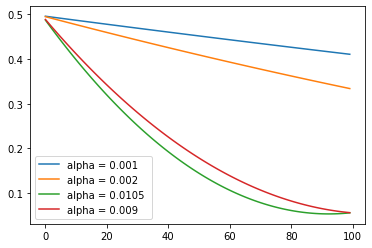

In [330]:
alphas = [0.001,0.002,0.0105,0.009]
for alpha in alphas:
    cost = []
    thetas = [[0]*len(x.columns)]
    itera = 100
    for i in range(itera):
        thetas = update_thetas(alpha,thetas,x_train,y_train)
        ith_cost = cost_function(thetas, x_train, y_train) 
        cost.append(ith_cost)
    plt.plot(range(itera), cost, label='alpha = {} '.format(alpha))
plt.legend() # set the legend
plt.show() # display the plot

In [331]:
alpha  = 0.0105
thetas = [[0]*len(x.columns)]
itera = 100
for i in range(itera):
     thetas = update_thetas(alpha,thetas,x_train,y_train)
print(thetas)

[[-0.01033928  0.66533745  0.46100617  0.34788377  0.17698207  0.43570012]]


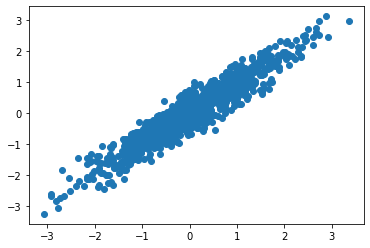

In [332]:
predictions = []
actual = []
n = len(y_test)
y_predicted = pd.DataFrame(np.transpose(np.dot(thetas,np.transpose(x_test))))
x = y_predicted[0]
y = y_test['Price']
y.index = list(np.arange(0,len(y.index),1))
residual_errors = y-x
plt.plot(x,y,marker='o',linestyle='None')

In [333]:
print("Mean of residual errors := {}".format(np.mean(residual_errors)))
print("Root Mean Squared Error := {}".format(np.sqrt(np.mean(np.power(residual_errors, 2)))))

Mean of residual errors := -0.0046542238160499644
Root Mean Squared Error := 0.33608472894886493


In [335]:
pred_arr = x.values
actu_arr = y.values
pred_arr = np.dot(std,pred_arr)+mean
actu_arr = np.dot(std,actu_arr)+mean
out = {'actual_price': [], 'predicted_price': []}
out['predicted_price'] = pred_arr
out['actual_price'] = actu_arr
out_df = pd.DataFrame(out)
print(out_df.head())

   actual_price  predicted_price
0  1.251689e+06     1.271318e+06
1  8.730483e+05     9.244084e+05
2  1.696978e+06     1.710256e+06
3  1.063964e+06     9.782103e+05
4  9.487883e+05     1.109831e+06


# Normal Equation method

In [371]:
x_normal = data[['dummy','Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y_normal = np.log(data[['Price']])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_normal,y_normal,test_size = 0.2,random_state=101)
print(x_train.info())
print(y_train.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3413 to 4959
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dummy                         4000 non-null   int64  
 1   Avg. Area Income              4000 non-null   float64
 2   Avg. Area House Age           4000 non-null   float64
 3   Avg. Area Number of Rooms     4000 non-null   float64
 4   Avg. Area Number of Bedrooms  4000 non-null   float64
 5   Area Population               4000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 218.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3413 to 4959
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   4000 non-null   float64
dtypes: float64(1)
memory usage: 62.5 KB
None


In [372]:
x = x_train
y = y_train
xt = x.T 
thetas = np.dot(np.dot(np.linalg.inv(np.dot(xt,x)),xt),y)
print(thetas)

[[1.04522115e+01]
 [1.96637438e-05]
 [1.52280694e-01]
 [1.08307733e-01]
 [3.67371923e-03]
 [1.36546218e-05]]


In [373]:
y_predicted = np.transpose(np.dot(np.transpose(thetas),x_test.T))
y_list = y_predicted.tolist()
y_flat_list = [item for sub in y_list for item in sub]

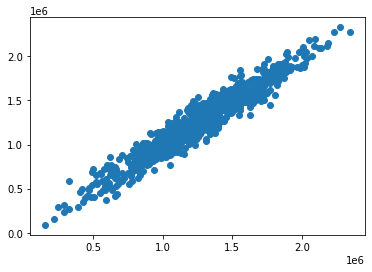

In [363]:
plt.plot(y_flat_list,y_test,marker = 'o',linestyle= "None")

In [374]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_predicted, y_test)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.13485673469882367


# using sklearn

In [375]:
x= data[['dummy','Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y= np.log(data[['Price']])

In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)

(4000, 6)
(1000, 6)


In [378]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [379]:
model.fit(X_train, y_train)

LinearRegression()

In [383]:
predictions = model.predict(X_test)

In [384]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions, y_test)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.13485673469884135
